## Iris Flower Classifier EDA

In [17]:
# import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
# load the dataset
iris_df = pd.read_csv('../data/iris.csv')
print(iris_df.head())
print("\n","-" * 50,"\n")

# print basic info about the dataset
print(iris_df.info())

   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

 -------------------------------------------------- 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


## Data Cleaning

In [14]:
# clean the data by checking for missing values
print("Missing values in each column:")
print(iris_df.isnull().sum())

# No missing values found, so no further cleaning needed
# the dataset is already clean and ready for analysis

Missing values in each column:
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


## Feature Analysis

In [15]:
# Count number of samples per species
print("Number of samples per species:")
print(iris_df['species'].value_counts())
print("\n","-" * 50,"\n")

# Analyse feature distributions
print("Feature distributions:")
print(iris_df.describe())

Number of samples per species:
species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

 -------------------------------------------------- 

Feature distributions:
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


#### Plot Histogram

<Figure size 1000x600 with 0 Axes>

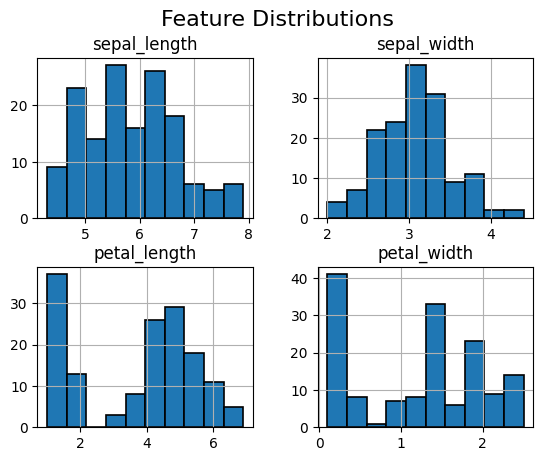

In [ ]:
# Histogram plot for identifying the type of distribution
plt.figure(figsize=(10,6))
iris_df.hist(edgecolor='black', linewidth=1.2)
plt.suptitle('Feature Distributions', fontsize=16)
plt.show()

#### Box Plots

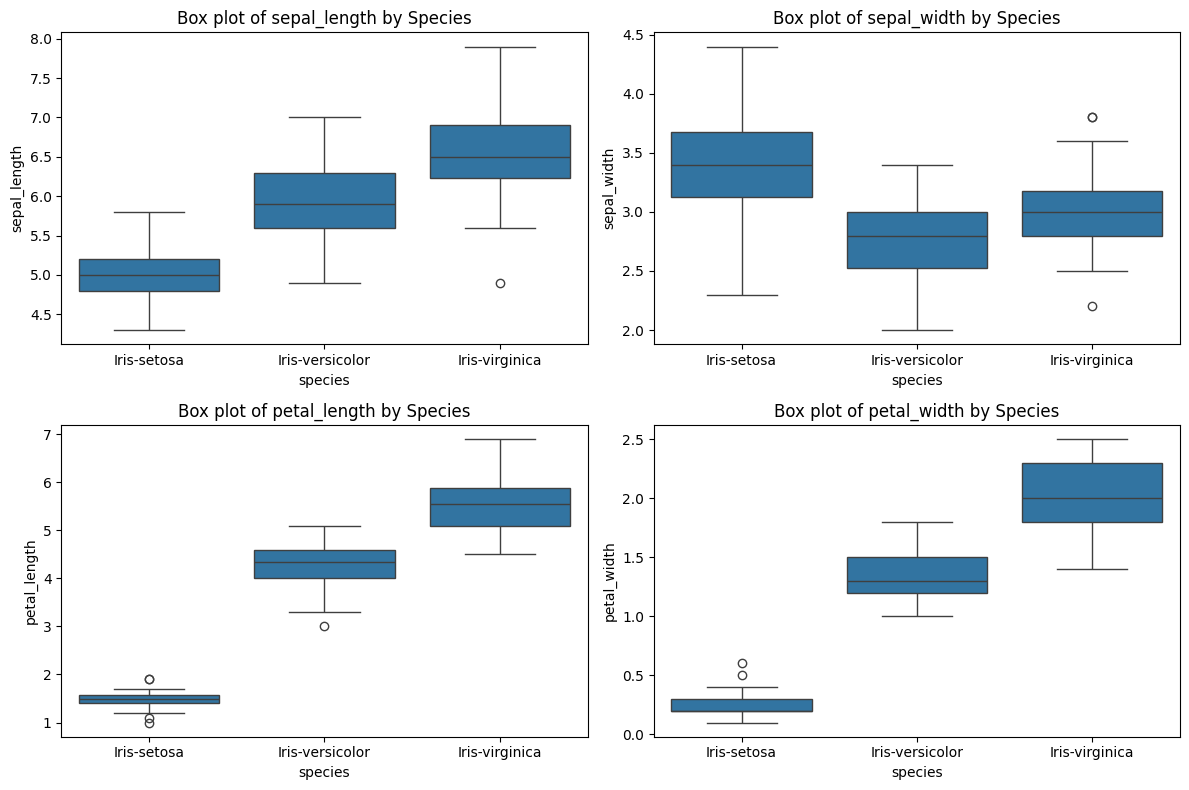

In [20]:
# Box plots to identify outliers
plt.figure(figsize=(12,8))
for i, column in enumerate(iris_df.columns[:-1], 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='species', y=column, data=iris_df)
    plt.title(f'Box plot of {column} by Species')
plt.tight_layout()
plt.show()

#### Pair Plot

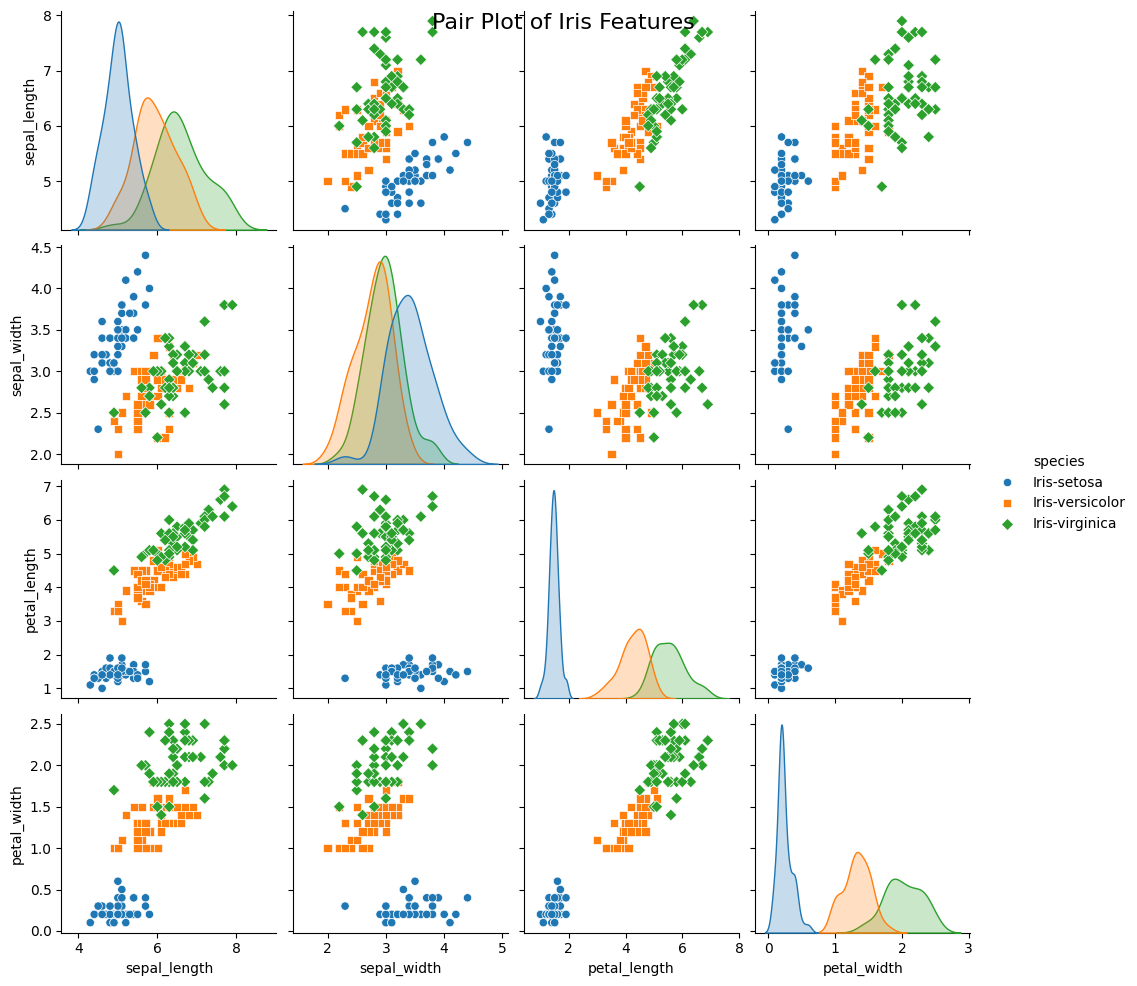

In [21]:
# Pair plot to visualize relationships between features
sns.pairplot(iris_df, hue='species', markers=["o", "s", "D"])
plt.suptitle('Pair Plot of Iris Features', fontsize=16)
plt.show()

#### Scatter Plot

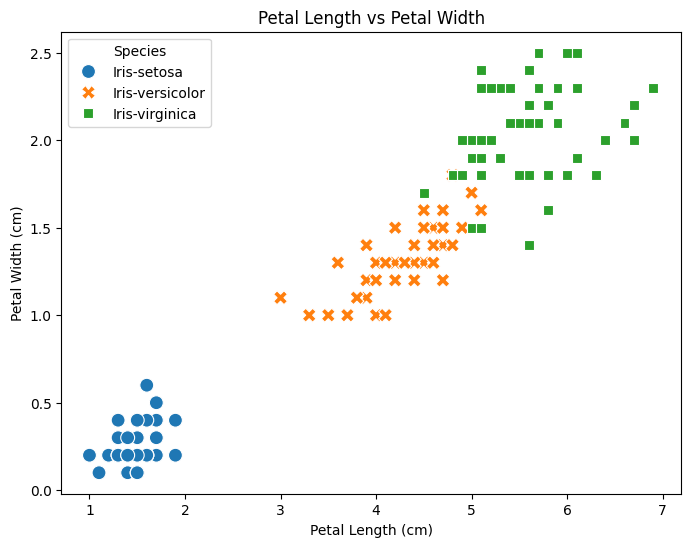

In [28]:
# Scatter plot for sepal length vs sepal width
plt.figure(figsize=(8,6))
sns.scatterplot(data=iris_df, x='petal_length', y='petal_width', hue='species', style='species', s=100)
plt.title('Petal Length vs Petal Width')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.legend(title='Species')
plt.show()

#### Plot Correlation heatmap

Correlation matrix:
               sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.109369      0.871754     0.817954
sepal_width      -0.109369     1.000000     -0.420516    -0.356544
petal_length      0.871754    -0.420516      1.000000     0.962757
petal_width       0.817954    -0.356544      0.962757     1.000000


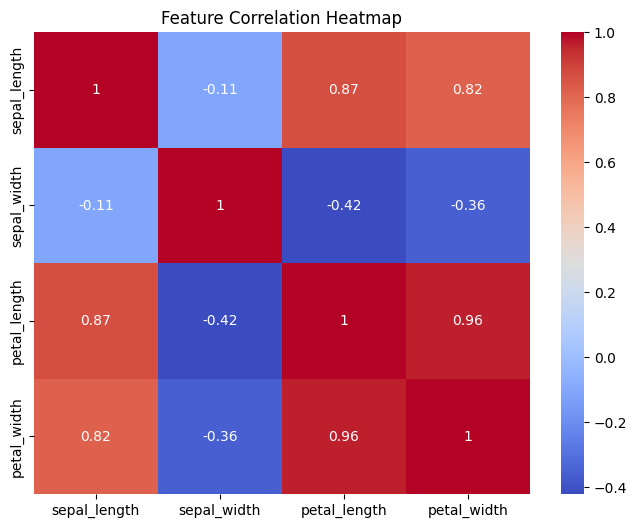

In [29]:
# Find correlation between features
correlation_matrix = iris_df.iloc[:,:4].corr()
print("Correlation matrix:\n", correlation_matrix)

# Plot correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

## Inferences from EDA